In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy.typing as npt
from typing import *
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
gdf = gpd.read_file(r"C:\Users\Conor\Desktop\tpsa_hackathon_CONOR\MAIN_FILE.geojson")
gdf = gdf.to_crs({'init': 'EPSG:29902'})
gdf['area_sq_km'] = gdf['geometry'].area / 1_000_000
gdf.info()

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GUID_            3409 non-null   object  
 1   2022_Population  3409 non-null   float64 
 2   2016_Population  3409 non-null   int32   
 3   2011_Population  3409 non-null   int32   
 4   2006_Population  3371 non-null   float64 
 5   2002_Population  3367 non-null   float64 
 6   1996_Population  3364 non-null   float64 
 7   geometry         3409 non-null   geometry
 8   area_sq_km       3409 non-null   float64 
dtypes: float64(5), geometry(1), int32(2), object(1)
memory usage: 213.2+ KB


In [21]:
gdf['2022_Density'] = gdf['2022_Population'] / gdf['area_sq_km']
gdf["2016_Density"] = gdf["2016_Population"] / gdf["area_sq_km"]
gdf["2011_Density"] = gdf["2011_Population"] / gdf["area_sq_km"]
gdf["2006_Density"] = gdf["2006_Population"] / gdf["area_sq_km"]
gdf["2002_Density"] = gdf["2002_Population"] / gdf["area_sq_km"]
gdf["1996_Density"] = gdf["1996_Population"] / gdf["area_sq_km"]

In [22]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GUID_            3409 non-null   object  
 1   2022_Population  3409 non-null   float64 
 2   2016_Population  3409 non-null   int32   
 3   2011_Population  3409 non-null   int32   
 4   2006_Population  3371 non-null   float64 
 5   2002_Population  3367 non-null   float64 
 6   1996_Population  3364 non-null   float64 
 7   geometry         3409 non-null   geometry
 8   area_sq_km       3409 non-null   float64 
 9   2022_Density     3409 non-null   float64 
 10  2016_Density     3409 non-null   float64 
 11  2011_Density     3409 non-null   float64 
 12  2006_Density     3371 non-null   float64 
 13  2002_Density     3367 non-null   float64 
 14  1996_Density     3364 non-null   float64 
dtypes: float64(11), geometry(1), int32(2), object(1)
memory usage: 373.0+ KB


In [58]:
import pandas as pd

# Read the birth-rate file
births_df = pd.read_csv(r"C:\Users\Conor\Documents\GitHub\alvaro_hackathon\data\birth_rates\ireland-population-birth-rate.csv")
fertility_df = pd.read_csv(r"C:\Users\Conor\Documents\GitHub\alvaro_hackathon\data\birth_rates\ireland-population-fertility-rate.csv")
population_growth_df = pd.read_csv(r"C:\Users\Conor\Documents\GitHub\alvaro_hackathon\data\birth_rates\ireland-population-growth-rate.csv")

# Display the dataframe
# print(births_df)
# print(fertility_df)
print(population_growth_df)
print(population_growth_df.columns)

     date         Population   Annual Growth Rate
0    1950-12-31       2906599                 NaN
1    1951-12-31       2924705                0.62
2    1952-12-31       2929379                0.16
3    1953-12-31       2917037               -0.42
4    1954-12-31       2902780               -0.49
..           ...          ...                 ...
146  2096-12-31       5746414               -0.08
147  2097-12-31       5740980               -0.09
148  2098-12-31       5735154               -0.10
149  2099-12-31       5728935               -0.11
150  2100-12-31       5722314               -0.12

[151 rows x 3 columns]
Index(['date       ', 'Population ', 'Annual Growth Rate'], dtype='object')


In [59]:
# Extract the year from the date column
births_df["year"] = births_df["date"].apply(lambda x: int(x[:4]))
fertility_df["year"] = fertility_df["date"].apply(lambda x: int(x[:4]))
population_growth_df["year"] = population_growth_df["date       "].apply(lambda x: int(x[:4]))



In [61]:
# Check the column names in the births_df dataframe
print(births_df.columns)

# Check the column names in the fertility_df dataframe
print(fertility_df.columns)

# Check the column names in the population_growth_df dataframe
print(population_growth_df.columns)

Index(['date', ' Births per 1000 People', ' Annual % Change', 'year'], dtype='object')
Index(['date', ' Births per Woman', ' Annual % Change', 'year'], dtype='object')
Index(['date       ', 'Population ', 'Annual Growth Rate', 'year'], dtype='object')


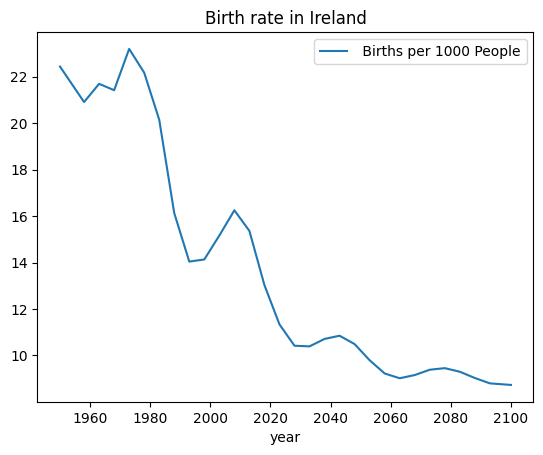

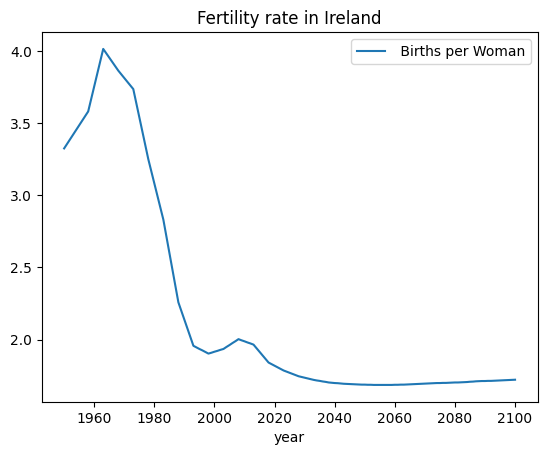

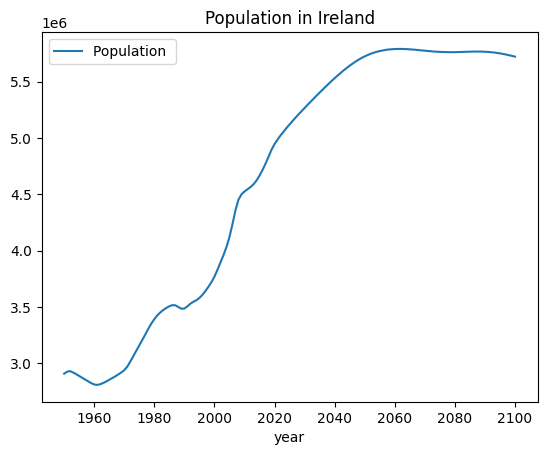

In [64]:
ax1 = births_df.plot(x='year', y=' Births per 1000 People', kind='line', title='Birth rate in Ireland')
ax2 = fertility_df.plot(x='year', y=' Births per Woman', kind='line', title='Fertility rate in Ireland')
ax3 = population_growth_df.plot(x='year', y='Population ', kind='line', title='Population in Ireland')

In [66]:
def adjust_birth_rate(mean_birth_rate, electoral_division):
    if gdf["2022_Density"].iloc[electoral_division] > 100:
        adjusted_birth_rate = mean_birth_rate - 2
    elif gdf["2022_Density"].iloc[electoral_division] > 50:
        adjusted_birth_rate = mean_birth_rate - 1
    elif gdf["2022_Density"].iloc[electoral_division] > 20:
        adjusted_birth_rate = mean_birth_rate
    elif gdf["2022_Density"].iloc[electoral_division] > 10:
        adjusted_birth_rate = mean_birth_rate + 1
    else:
        adjusted_birth_rate = mean_birth_rate + 2
    
    return adjusted_birth_rate